In [54]:
import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import resize

In [2]:
sn = rio.open('/data/spacenet/bldg/data/pytorch-PAN-valid/images/PAN_AOI_2_Vegas_img1006.tif')

In [12]:
sn.transform

Affine(2.699999999982503e-06, 0.0, -115.2794376,
       0.0, -2.699999999993434e-06, 36.1879676998)

In [6]:
dg = rio.open('200414_fbnc_74_pan_clo_R1C1.tif')

In [13]:
dg.transform

Affine(4.500000005001551e-06, 0.0, -79.17016267776489,
       0.0, -4.499999999001431e-06, 35.12586715888555)

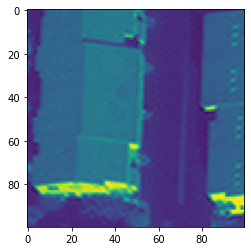

In [36]:
sn_img = sn.read(1)[0:100,400:500]
plt.imshow(sn_img)

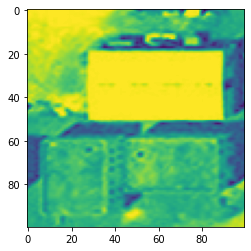

In [37]:
dg_img = dg.read(1)[550:650, 1600:1700]
plt.imshow(dg_img)

In [61]:
scale_fac = sn.transform[0] / dg.transform[0]
before_shape = np.array(dg.read(1).shape)
after_shape = np.array(before_shape * scale_fac, dtype = 'uint16')

In [62]:
before_shape

array([1564, 3262])

In [63]:
after_shape

array([ 938, 1957], dtype=uint16)

In [64]:
dg_res = resize(dg.read(1), after_shape)

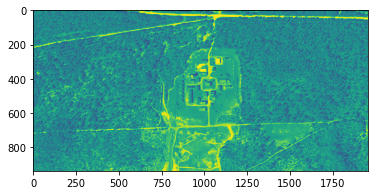

In [65]:
plt.imshow(dg_res)

In [67]:
dg_res_test = dg.read(1)[int(550*scale_fac):int(650*scale_fac), 
                         int(1600*scale_fac):int(1700*scale_fac)]

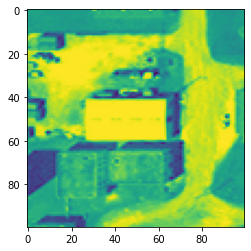

In [73]:
plt.imshow(dg_res[300:400, 950:1050])

In [74]:
from skimage.io import imsave

In [76]:
imsave('FBNC_res.tiff', dg_res*255)